In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_features_train = pd.read_csv('./data/dengue_features_train.csv')
print('Infromaion about the features_train \n', df_features_train.info(verbose=True, show_counts=True))
df_features_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df_labels_train = pd.read_csv('./data/dengue_labels_train.csv')
print('Infromaion about the labels_train \n', df_labels_train.info(verbose=True, show_counts=True))
df_labels_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB
Infromaion about the labels_train 
 None


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [4]:
df_features_test = pd.read_csv('./data/dengue_features_test.csv')
print('Infromaion about the features_test \n', df_features_test.info(verbose=True, show_counts=True))
df_features_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


## Data Analysis - Total_cases

Analysis the distribution of the labels

In [5]:
df_train_with_label = pd.concat([df_features_train, df_labels_train.loc[:,'total_cases']], axis=1)

### Analysis Data with All Rows

In [ ]:
df_train_with_label['week_start_date']=pd.to_datetime(df_train_with_label['week_start_date'])

In [59]:
df_train_with_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   weekofyear                             1456 non-null   int64         
 3   week_start_date                        1456 non-null   datetime64[ns]
 4   ndvi_ne                                1262 non-null   float64       
 5   ndvi_nw                                1404 non-null   float64       
 6   ndvi_se                                1434 non-null   float64       
 7   ndvi_sw                                1434 non-null   float64       
 8   precipitation_amt_mm                   1443 non-null   float64       
 9   reanalysis_air_temp_k                  1446 non-null   float64 

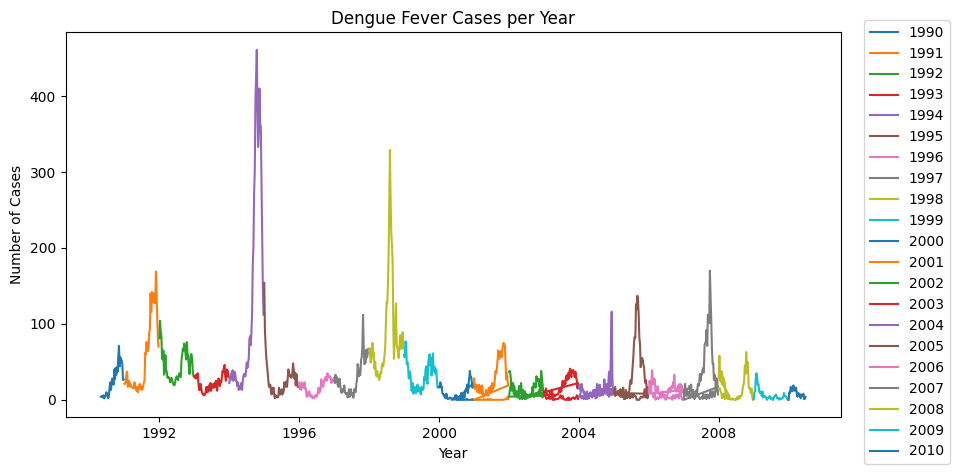

In [6]:
fig,ax = plt.subplots(figsize=(10,5))
for i in np.unique(df_train_with_label['year']):
    ax.plot(df_train_with_label[df_train_with_label['week_start_date'].dt.year==i].week_start_date, 
      df_train_with_label[df_train_with_label['week_start_date'].dt.year==i].total_cases, label='%d'%(i))
    ax.legend()

ax.set_title('Dengue Fever Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Cases')
ax.legend(bbox_to_anchor=(1.15, 1.05))
#plt.savefig('dengue.png')


> **Note:** The labels are overlapped, therefore we split the citys

In [7]:
print(df_features_train['city'].value_counts())
sj_train_with_label = df_train_with_label[df_train_with_label['city']=='sj']
iq_train_with_label = df_train_with_label[df_train_with_label['city']=='iq']

sj    936
iq    520
Name: city, dtype: int64


Text(0.5, 0.98, 'DENGUE ACTUAL CASES')

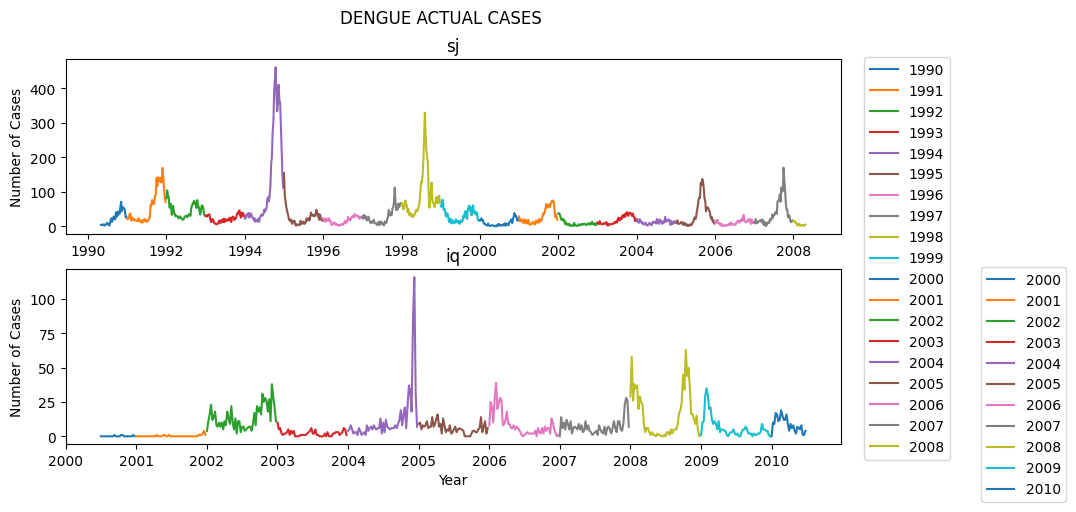

In [8]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize=(10,5))
for i in np.unique(sj_train_with_label['year']):
    ax1.plot(sj_train_with_label[sj_train_with_label['week_start_date'].dt.year==i].week_start_date, 
      sj_train_with_label[sj_train_with_label['week_start_date'].dt.year==i].total_cases, label='%d'%(i))
    ax1.legend()
ax1.set_title('sj')
ax1.set_ylabel('Number of Cases')
ax1.legend(bbox_to_anchor=(1.15, 1.05))

for i in np.unique(iq_train_with_label['year']):
    ax2.plot(iq_train_with_label[iq_train_with_label['week_start_date'].dt.year==i].week_start_date, 
      iq_train_with_label[iq_train_with_label['week_start_date'].dt.year==i].total_cases, label='%d'%(i))
    ax2.legend()
ax2.set_title('iq')
ax2.set_ylabel('Number of Cases')
ax2.set_xlabel('Year')
ax2.legend(bbox_to_anchor=(1.3, 1.05))

plt.suptitle("DENGUE ACTUAL CASES")

### Test and Train Data Analysis by Years and Months

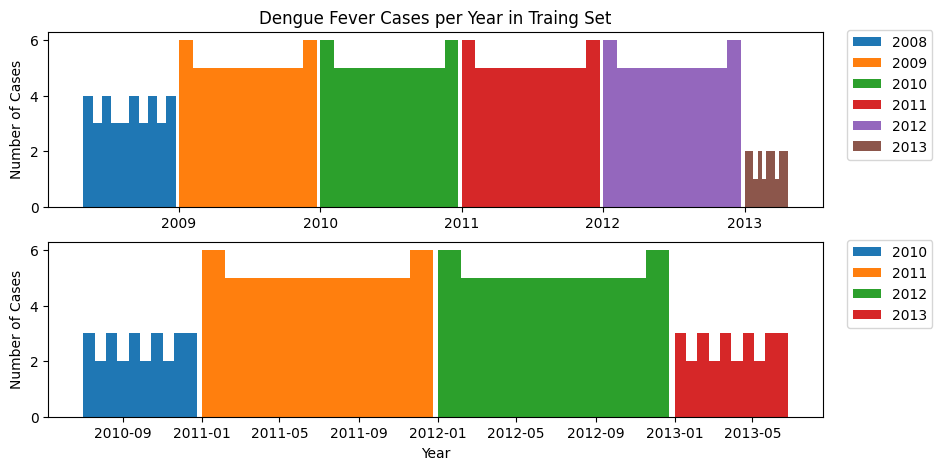

In [9]:
df_features_test['week_start_date']=pd.to_datetime(df_features_test['week_start_date'])
sj_features_test = df_features_test[df_features_test['city']=='sj']
iq_features_test = df_features_test[df_features_test['city']=='iq']
fig, (ax1, ax2)= plt.subplots(2, 1, figsize=(10,5))
for i in np.unique(sj_features_test['year']):
    ax1.hist(sj_features_test[sj_features_test['week_start_date'].dt.year==i].week_start_date, label='%d'%(i))
    ax1.legend()
ax1.set_title('Dengue Fever Cases per Year in Traing Set')
ax1.set_ylabel('Number of Cases')
ax1.legend(bbox_to_anchor=(1.15, 1.05))

for i in np.unique(iq_features_test['year']):
    ax2.hist(iq_features_test[iq_features_test['week_start_date'].dt.year==i].week_start_date, label='%d'%(i))
    ax2.legend()
ax2.set_ylabel('Number of Cases')
ax2.set_xlabel('Year')
ax2.legend(bbox_to_anchor=(1.15, 1.05))

<AxesSubplot: xlabel='year'>

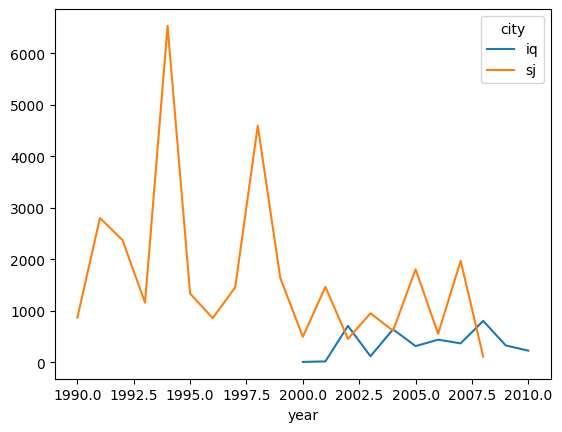

In [10]:
pv = pd.pivot_table(df_train_with_label, index=df_train_with_label.year, columns=df_train_with_label.city,
                    values='total_cases', aggfunc='sum')
pv.plot()

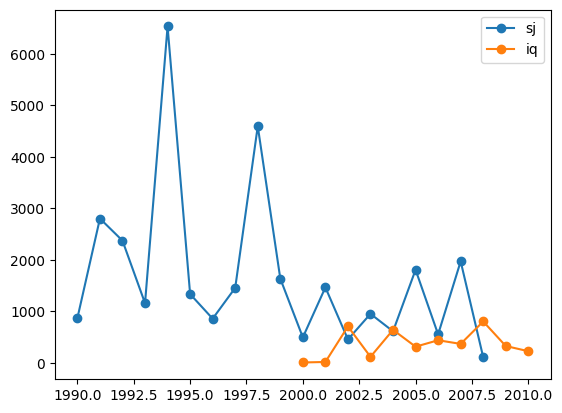

In [55]:
plt.plot(sj_train_with_label.groupby(['year'])['total_cases'].sum(), '-o', label='sj')
plt.plot(iq_train_with_label.groupby(['year'])['total_cases'].sum(), '-o', label='iq')
plt.legend()

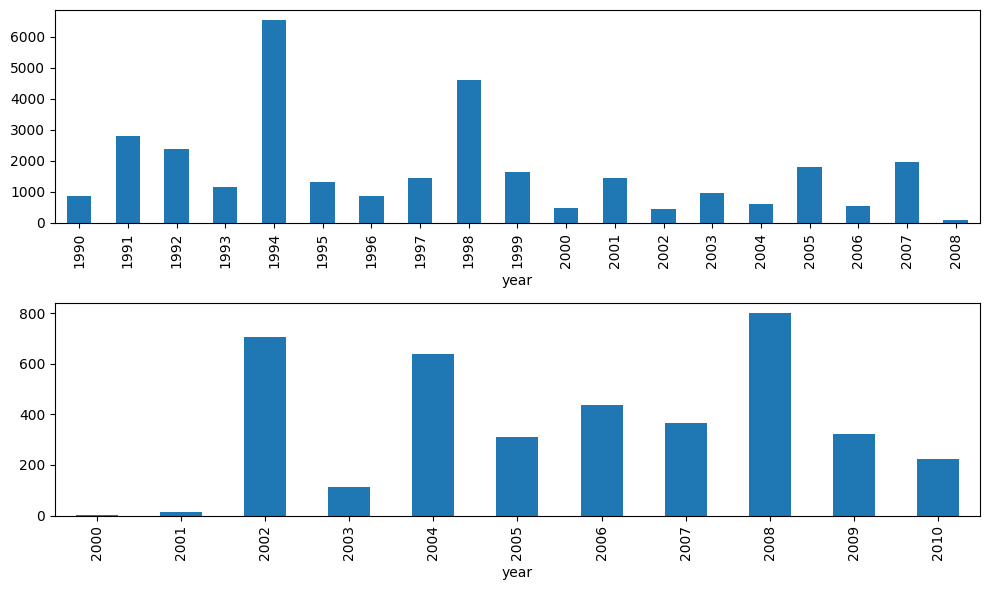

In [141]:
fig2, axes= plt.subplots(nrows=2, ncols=1, figsize=(10,6))
sj_train_with_label.groupby(['year']).total_cases.sum().plot(kind='bar', ax=axes[0])
iq_train_with_label.groupby(['year']).total_cases.sum().plot(kind='bar', ax=axes[1])
fig2.tight_layout()

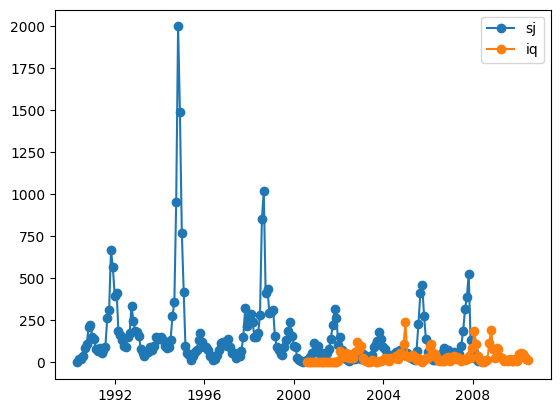

In [61]:
plt.plot(sj_train_with_label.groupby(pd.Grouper(key='week_start_date',freq="M"))['total_cases'].sum(), '-o', label='sj')
plt.plot(iq_train_with_label.groupby(pd.Grouper(key='week_start_date', freq="M"))['total_cases'].sum(), '-o', label='iq')
plt.legend()

In [136]:
pv3 = pd.pivot_table(sj_train_with_label, index=pd.DatetimeIndex(sj_train_with_label['week_start_date']).month, 
                     columns=sj_train_with_label['year'], values='total_cases', aggfunc='sum')

pv4 = pd.pivot_table(iq_train_with_label, index=pd.DatetimeIndex(iq_train_with_label['week_start_date']).month, 
                     columns=iq_train_with_label['year'], values='total_cases', aggfunc='sum')

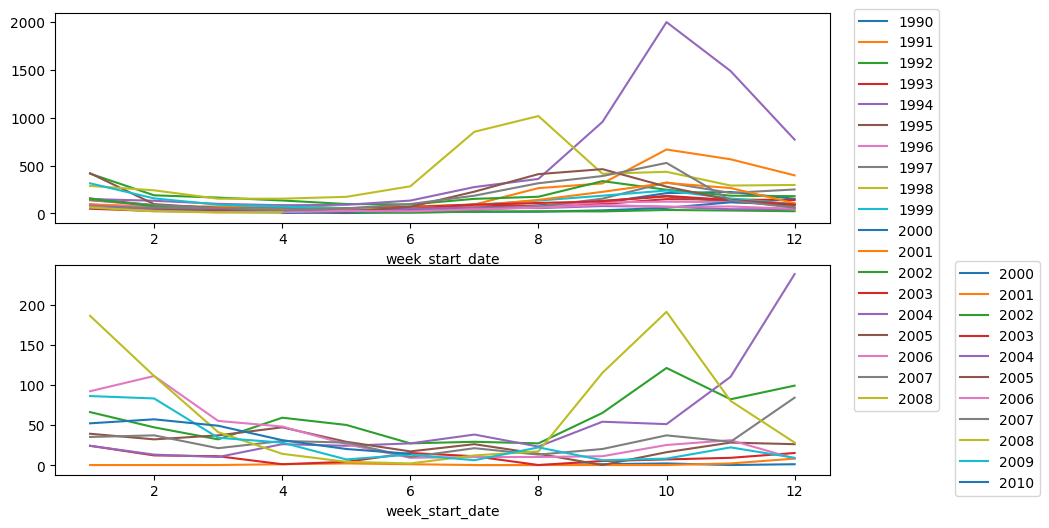

In [143]:
fig3, axes= plt.subplots(nrows=2, ncols=1, figsize=(10,6))
pv3.plot(ax=axes[0])
pv4.plot(ax=axes[1])
axes[0].legend(bbox_to_anchor=(1.15, 1.05))
axes[1].legend(bbox_to_anchor=(1.28, 1.05))
# fig3.tight_layout()